In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
from theory.helpers import labelLine, test_annotations, labelLine_at_x, labelLine_at_y, draw_circles, draw_squares, draw_stars
import gameBoardDisplay as gbd

from scipy import stats


%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.collections as collections
import matplotlib.patches as mpatches

from matplotlib import patheffects


mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [10, 20]

colors = ["green", "blue", "red", "orange", "purple",
          "gold", "lime", "magenta", "crimson", "cyan"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


In [3]:
gs0 = GameSettings([], None, 4, 8, 2, [8], [4, 8, 14])
gs1 = GameSettings([], None, 4, 12, 0, [8], [4, 8, 12,16])

In [4]:
def formatAxis(ax, xlim, ylim, xticksRange=(0, 9)):
    ax.set_aspect("equal", "box")
    ax.set_ylim(*ylim)
    ax.set_xlim(*xlim)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")

def y_Axis_ticks(ax, tickCount):
    ax.set_yticks(range(tickCount+1))


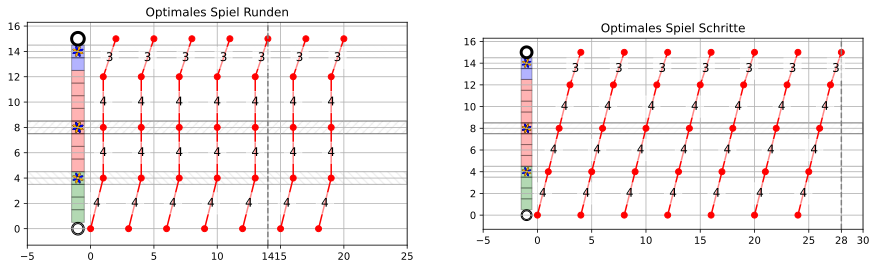

In [5]:

# xy = np.array((-2.,   7.5)) + (.5, .5)
xy = np.array((0,0))
offset = np.array((.1, .1))

fig, ax = plt.subplot_mosaic([["p0","p1"]], figsize=[15, 5],constrained_layout=False)
gbd.makeGameboardDisplay(ax["p0"], *list(gs0.getFieldsSettings().values()), xoff=1.5)
gbd.makeGameboardDisplay(ax["p1"], *list(gs0.getFieldsSettings().values()), xoff=1.5,)

# ax.add_patch(rect)

ax["p0"].set_ybound(7.5, 8.5)
ax["p0"].set_xlim(7.5, 18.5)
ax["p0"].axis("equal")
# ax["p0"].axis("off")


paths = [
    ((0,1,1,1,2),(0,4,8,12,15)),
    ((0,1,1,1,2),(0,4,8,11,15)),
    ((0,1,1,1,2,2),(0,4,8,12,13,15)),
    ((0,1,1,1,2,2),(0,4,8,11,13,15)),
    ((0,1,1,1,2,2),(0,4,8,10,13,15)),
    ((0,1,1,1,2,2),(0,4,8,9,13,15)),
    ]
paths = [((0,1,1,1,2),(0,4,8,12,15))]*7
offset = 0
for i,path in enumerate(paths):
    x0 = [(x_+i*3) for x_ in path[0]]
    x1 = [x+sum([sum(p[0])-1 for p in paths[:i]]) for x in range(len(path[0]))]
    y= path[1]
    ax["p0"].plot(x0,y,marker="o", color="red")
    ax["p1"].plot(x1,y,marker="o", color="red")


# ax.grid(True, alpha=0.5)

ax["p0"].set_title("Optimales Spiel Runden")
ax["p1"].set_title("Optimales Spiel Schritte")
ax["p0"].set_xticks(list(ax["p0"].get_xticks())+[14])
ax["p1"].set_xticks(list(ax["p1"].get_xticks())+[28])


for a_n in ax:
    ax[a_n].grid()
    ax[a_n].set_aspect("equal","box")
    lines = ax[a_n].get_lines()
    for line in lines:
        labelLine(line, color="black",backgroundcolor="#ffffff88",size=12)
ax["p0"].axvline(14, ls="--",color="gray")
ax["p1"].axvline(28, ls="--",color="gray")
ax["p0"].sharey(ax["p1"])




In [6]:
paths = [
    ((0, 1, 1, 1, 2), (0, 4, 8, 12, 15)),
    ((0, 1, 1, 1, 2), (0, 4, 8, 11, 15)),
    ((0, 1, 1, 1, 2, 2), (0, 4, 8, 12, 14, 15)),
    ((0, 1, 1, 1, 2, 2), (0, 4, 8, 11, 14, 15)),
    ((0, 1, 1, 1, 2, 2), (0, 4, 8, 10, 14, 15)),
]
paths_round = [
    ((0, 1, 2), (0, 12, 15)),
    ((0, 1, 2), (0,    11, 15)),
    ((0, 1, 2), (0, 12, 15)),
    ((0, 1, 2), (0, 11, 15)),
    ((0, 1, 2), (0, 10, 15)),
]


In [7]:
def format_axs(axs, range_x):
    axs.flat[0].sharey(axs.flat[1])
    for i, ax in enumerate(axs.flat):
        if i == 0:
            gbd.makeGameboardDisplay(
                axs[i], *list(gs0.getFieldsSettings().values()), xoff=1.5)
            ax.set_xlim(-2.2, range_x+1.2)
        else:
            gbd.makeGameboardDisplay(
                axs[i], *list(gs0.getFieldsSettings().values()), xoff=2.5)
            ax.set_xlim(-.5, range_x+1.2)
        ax.set_aspect("equal", "box")
        ax.set_xticks(range(0, range_x+1))
        ax.set_yticks(range(0, 16))
        ax.set(title="Weg {}".format(i+1))
        ax.grid(zorder=0, alpha=.4)
        ax.label_outer()


In [8]:
def plot_paths(paths, figsize, min_val: int, name: str, zusatz="", lablelines=True):
    fig, axs = plt.subplots(
        1, len(paths), figsize=figsize, layout="constrained")
    plot_in_fig(axs, paths, min_val, lablelines=lablelines)

    # fig.suptitle(
    #     "Die Schnellsten Wege über das Spielbrett"+zusatz)
    # # with adjusted position
    fig.supylabel('Fortschritt auf dem Spielbrett')
    fig.supxlabel(name)  # with adjusted position
    return fig,axs


def plot_in_fig(axs, paths, min_val: int, color="red", lablelines=True):
    max_x = max([max(p[0]) for p in paths])
    print(max_x)
    format_axs(axs, max_x)
    for i, path in enumerate(paths):

        axs[i].plot(path[0], path[1], marker="o", color=color, ls="-")
        if lablelines:
            for l in axs[i].get_lines():
                labelLine_at_x(l, max_x+.7)

        axs[i].axvline(min_val, ls="--", color="gray", zorder=0)

   


2


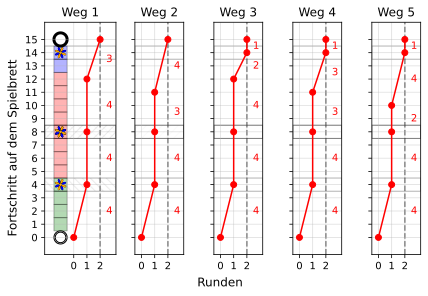

In [9]:

fig_rounds,_ = plot_paths(
    paths, [6, 4], 2, "Runden", "\n jeweils ein Spielstein")


4


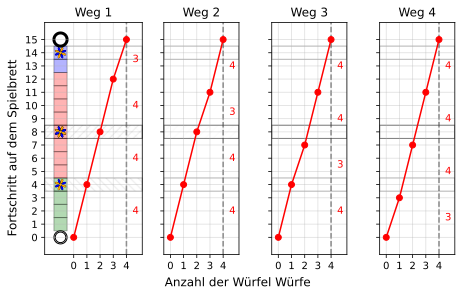

In [10]:
paths_steps = [
    ((0, 1, 1, 1, 2), (0, 4, 8, 12, 15)),
    ((0, 1, 1, 1, 2), (0, 4, 8, 11, 15)),
    ((0, 1, 1, 1, 2), (0, 4, 7, 11, 15)),
    ((0, 1, 1, 1, 2), (0, 3, 7, 11, 15)),
    ]
fig_steps, _ = plot_paths(
    [(range(len(p[0])), p[1]) for p in paths_steps], [6.5, 4], 4, "Anzahl der Würfel Würfe", "\n jeweils ein Spielstein")


12
12
12


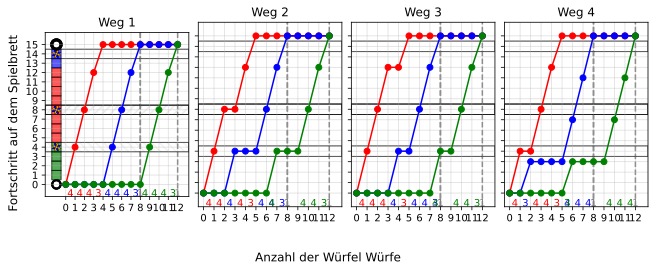

In [15]:
paths_steps_0 = [
    [4, 4, 4, 3, 0, 0, 0, 0,0,0,0,0],
    [4, 4, 0, 4, 3, 0, 0, 0,0,0,0,0],
    [4, 4, 4, 0, 3, 0, 0, 0,0,0,0,0],
    [4, 0, 4, 4, 3, 0, 0, 0,0,0,0,0],
]
paths_steps_1 = [
    [0, 0, 0, 0, 4, 4, 4, 3,0,0,0,0],
    [0, 0, 4, 0, 0, 4, 4, 3,0,0,0,0],
    [0, 0, 0, 4, 0, 4, 4, 3,0,0,0,0],
    [0, 3, 0, 0, 0, 4, 4, 4,0,0,0,0],
]
paths_steps_2 = [
    [0,0,0,0,0, 0, 0, 0, 4, 4, 4, 3],
    [0,0,0,0,0, 0, 4, 0, 0, 4, 4, 3],
    [0,0,0,0,0, 0, 0, 4, 0, 4, 4, 3],
    [0,0,0,0,0, 3, 0, 0, 0, 4, 4, 4],
]


def format_Path(path):
    x = 0
    y = 0
    ps_formated = [[0], [0]]
    for th in path:
        y += th
        x += 1
        ps_formated[0].append(x)
        ps_formated[1].append(y)
    return ps_formated


ps_0 = [format_Path(p) for p in paths_steps_0]
ps_1 = [format_Path(p) for p in paths_steps_1]
ps_2 = [format_Path(p) for p in paths_steps_2]


fig_steps2, axs = plot_paths(
    ps_0, [9, 4], 8, "Anzahl der Würfel Würfe", "\n jeweils zwei Spielsteine", False)
plot_in_fig(axs, ps_1, 8, "blue", False)
plot_in_fig(axs, ps_2, 12, "green", False)
for ax in axs.flat:
    for l in ax.get_lines():
        labelLine_at_y(l, -1, ignore0=True)


In [12]:
fig_rounds.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/shortes_game_rounds_1S.png",dpi=300,)
fig_steps.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/shortes_game_steps_1S.png",dpi=300,)


In [13]:
# figFinkel, ax = plt.subplot_mosaic([["p0"]], figsize=[
#                              15, 5], constrained_layout=True)
# gbd.makeGameboardDisplay(
#     ax["p0"], *list(gs1.getFieldsSettings().values()), xoff=1.5)
# formatAxis(ax["p0"],(-1.6,10.5),(-.6,17.6))
# y_Axis_ticks(ax["p0"], 17)

# path = ((0, 1, 1, 1,1, 2), (0, 4, 8, 12, 16, 17))

# for i in range(5):
#     x0 = [(x_+i*2) for x_ in path[0]]
#     x1 = [x+sum([sum(p[0])-1 for p in paths[:i]]) for x in range(len(path[0]))]
#     y = path[1]
#     ax["p0"].plot(x0, y, marker="o", color="red")

# for a_n in ax:
#     ax[a_n].grid(axis="x")
#     ax[a_n].set_aspect("equal", "box")
#     lines = ax[a_n].get_lines()
#     for line in lines:
#         labelLine(line, color="black", backgroundcolor="#ffffff88", size=12)
# ax["p0"].axvline(10, ls="--", color="gray")
